In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [4]:
from feature_engine.discretisation import GeometricWidthDiscretiser

In [3]:
# Load dataset
X, y = fetch_openml(name='house_prices', version=1, return_X_y=True, as_frame=True)
X.set_index('Id', inplace=True)

# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
disc=GeometricWidthDiscretiser(bins=10, variables=['LotArea','GrLivArea'])
disc.fit(X_train)

GeometricWidthDiscretiser(variables=['LotArea', 'GrLivArea'])

In [7]:
t_train=disc.transform(X_test)

In [8]:
t_test=disc.transform(X_test)

In [9]:
disc.binner_dict_

{'LotArea': [-inf,
  1303.4121664944212,
  1311.64288018565,
  1339.7274456680343,
  1435.556659017401,
  1762.5418899948415,
  2878.2699393066086,
  6685.319806054034,
  19675.607803959916,
  64000.63326329492,
  inf],
 'GrLivArea': [-inf,
  336.31083524024336,
  339.33995950755053,
  346.3397666115203,
  362.5151675422793,
  399.8938540381423,
  486.2698400267907,
  685.8705123601251,
  1147.1147799642595,
  2212.974287904127,
  inf]}

Text(0.5, 1.0, 'Discretised')

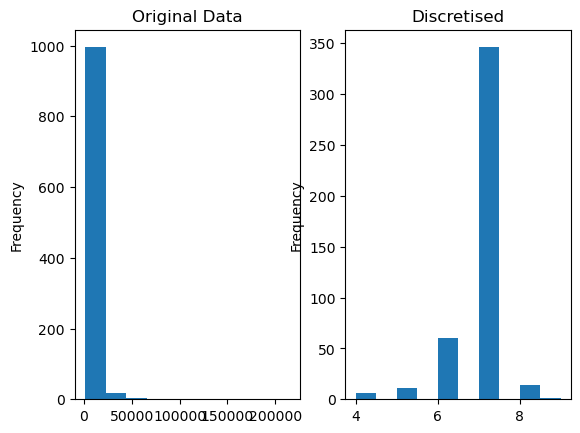

In [13]:
fig, ax=plt.subplots(1,2)
X_train['LotArea'].plot.hist(bins=10,ax=ax[0])
ax[0].set_title('Original Data')

t_train['LotArea'].plot.hist(bins=10,ax=ax[1])
ax[1].set_title('Discretised')